In [2]:
# Importing the Qiskit standard library and setting up an account
# Version: qiskit 2.2.1 ; Python 3.13.8  it should work !!
import math
from math import sqrt
from numpy import pi 
from qiskit import *
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import *

In [3]:
# Choosing a quantum simulator (or processor).
# backend = BasicAer.get_backend('qasm_simulator')
backend = AerSimulator(method='unitary')

In [4]:
# utest = Operator(Oracle Uf)
utest=Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/sqrt(2), -1/sqrt(2)], [0, 0, 1/sqrt(2), 1/sqrt(2)]])
Operator.is_unitary(utest) # or utest.is_unitary()

True

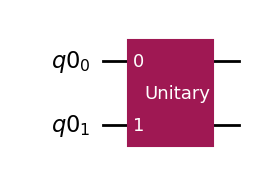

In [5]:
# Creating quantum, classical registers and a quantum circuit
n0=2 # Number of qubits and bits
q0 = QuantumRegister(n0) # Quantum Register
# c0 = ClassicalRegister(n0) # Classical Register
Utest = QuantumCircuit(q0,name='Uf') # Quantum algorithm - quantum circuit
Utest.append(utest,[0,1])
Utest.draw(output='mpl') # Quantum circuit sketch


In [6]:
Uf=Utest.to_gate()

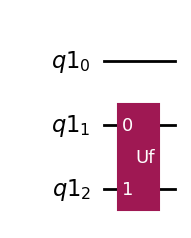

In [7]:
# Creating quantum, classical registers and a quantum circuit
n=3 # Number of qubits and bits
q = QuantumRegister(n) # Quantum Register
# c = ClassicalRegister(n) # Classical Register
# circuit0 = QuantumCircuit(q, c) # Algorytm kwantowy - kwantowy obwód
Circuit = QuantumCircuit(q) # Quantum algorithm - quantum circuit
Circuit.append(Uf,[q[1],q[2]])
Circuit.draw(output='mpl') # Quantum circuit sketch

In [8]:
Operator(Circuit)

Operator([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  1.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            1.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.70710678+0.j,  0.        +0.j,
           -0.70710678+0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.        +0.j

In [9]:
Operator(Circuit).to_matrix()

array([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  1.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.        +0.j,
        -0.70710678+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.      

In [10]:
print(backend.configuration().basis_gates) # basis gates in used backend

['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'delay', 'reset', 'save_state', 'save_unitary', 'set_unitary']


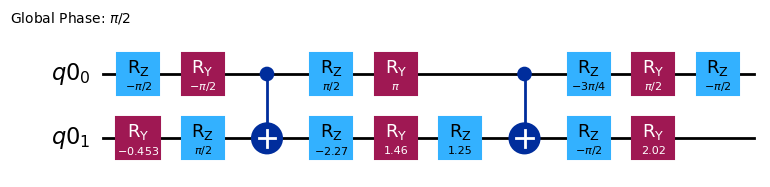

In [11]:
circuit0_transpile=transpile(Utest, basis_gates=['rz', 'ry', 'cx']) # see Lecture 4 and 5, decomposition of unitary transformations into such quantum gates that are understood by a quantum compiler
circuit0_transpile.draw(output='mpl') 

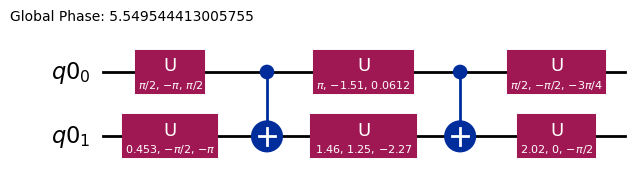

In [12]:
circuit0_decomp=Utest.decompose(reps=2) # see Lecture 4 and 5, decomposition Utest into such quantum gates that are understood by a quantum compiler 
circuit0_decomp.draw(output='mpl') 

In [13]:
# Copy of the circuit not to modify the original one
circuit_to_run = circuit0_transpile.copy()

# Important: In new Aer we need to manually save unitary matrix
circuit_to_run.save_unitary()

# New method of running in Qiskit 1.0+ / 2.0+
job = backend.run(circuit_to_run)
results = job.result()

# Getting the results
print(results.get_unitary(circuit_to_run, decimals=3))

Operator([[ 1.   +0.j,  0.   -0.j,  0.   -0.j,  0.   -0.j],
          [-0.   -0.j,  1.   +0.j, -0.   +0.j,  0.   -0.j],
          [-0.   -0.j,  0.   +0.j,  0.707+0.j, -0.707-0.j],
          [-0.   -0.j, -0.   -0.j,  0.707+0.j,  0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [14]:
circuit_to_run_decomp = circuit0_decomp.copy()
circuit_to_run_decomp.save_unitary()

job = backend.run(circuit_to_run_decomp)
results = job.result()

print(results.get_unitary(circuit_to_run_decomp, decimals=3))

Operator([[ 1.   +0.j,  0.   -0.j,  0.   -0.j,  0.   +0.j],
          [-0.   -0.j,  1.   +0.j,  0.   -0.j,  0.   -0.j],
          [-0.   -0.j,  0.   +0.j,  0.707+0.j, -0.707-0.j],
          [-0.   -0.j, -0.   -0.j,  0.707+0.j,  0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [15]:
145203 %64

51

In [16]:
136225 %64

33

## 151936 Lab

### Util

In [127]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


XOR_TARGET = '00'
PHASE_TARGET = '011'
SHOTS = 1024
BACKEND = AerSimulator()

In [128]:
class TargetFunction():
    def __init__(self, target):
        self.target = target
    
    def compare(self, x):
        raise NotImplementedError("Subclasses should implement this method.")
    
class BinaryTargetFunction(TargetFunction):
    def __init__(self, target):
        super().__init__(int(target, 2))

class SameTargetFunction(BinaryTargetFunction):
    def __init__(self, target):
        super().__init__(target)
    
    def compare(self, x):
        return x == self.target

In [129]:
def createXOROracle(f, n):
    dim = 2 ** (n + 1)
    U = np.zeros((dim, dim), dtype=complex)

    for y in (0, 1):
        for x in range(2**n):
            input_index = (y << n) | x
            new_y = y ^ int(f.compare(x))
            output_index = (new_y << n) | x
            U[output_index, input_index] = 1.0

    return U

def createPhaseOracle(f, n):
    dim = 2 ** n
    U = np.zeros((dim, dim), dtype=complex)

    for x in range(dim):
        U[x, x] = (-1) ** f.compare(x)

    return U

### Creation of Oracles

In [130]:
matrixXOR = createXOROracle(SameTargetFunction(XOR_TARGET), len(XOR_TARGET))
matrixPhase = createPhaseOracle(SameTargetFunction(PHASE_TARGET), len(PHASE_TARGET))

print(f"Task 1.1: XOR Oracle Matrix (n={len(XOR_TARGET) + 1}, target address='{XOR_TARGET}'):")
print(np.round(matrixXOR.real, 1))

print(f"\nTask 1.2: Phase Oracle Matrix (n={len(PHASE_TARGET)}, target address='{PHASE_TARGET}'):")
print(np.round(matrixPhase.real, 1))

gateUF = Operator(matrixPhase)
print("\nIs the Phase Oracle Unitary?", gateUF.is_unitary())

Task 1.1: XOR Oracle Matrix (n=3, target address='00'):
[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

Task 1.2: Phase Oracle Matrix (n=3, target address='011'):
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]

Is the Phase Oracle Unitary? True


### Explicit Form Matrices

In [131]:
N = 2 ** n
ket = np.zeros((N, 1))
ket[0, 0] = 1
identity = np.eye(N)
task3 = ket @ ket.T

print(f"\nTask 3: Matrix form of |0>_n <0| (n={n}):")
print(task3)

task4 = 2 * task3 - identity
print(f"\nTask 4: Matrix form of 2|0>_n <0| - I (n={n}):")
print(task4)

ket = np.zeros((N, 1))
ket[N-1, 0] = 1
projector = ket @ ket.T
right = 2 * projector - identity

opX = Operator.from_label('X' * n).to_matrix()
left = opX @ task4 @ opX

task5 = right - left
print(f"\nTask 5:")
print("We can verify that all entries are zero so both operators are equal:")
print(task5)



Task 3: Matrix form of |0>_n <0| (n=3):
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

Task 4: Matrix form of 2|0>_n <0| - I (n=3):
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]]

Task 5:
We can verify that all entries are zero so both operators are equal:
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.

### Grover's diffusion operator

In [132]:
opH = Operator.from_label('H' * n).to_matrix()
W = opH @ task4 @ opH

print(f"\nTask 6: Matrix form of W (n={n}):")
print(W)
print("Is W unitary?", np.allclose(W.conj().T @ W, np.eye(N)))


Task 6: Matrix form of W (n=3):
[[-0.75+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
   0.25+0.j]
 [ 0.25+0.j -0.75+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
   0.25+0.j]
 [ 0.25+0.j  0.25+0.j -0.75+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
   0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j -0.75+0.j  0.25+0.j  0.25+0.j  0.25+0.j
   0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j -0.75+0.j  0.25+0.j  0.25+0.j
   0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j -0.75+0.j  0.25+0.j
   0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j -0.75+0.j
   0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
  -0.75+0.j]]
Is W unitary? True


In [77]:
def createUf(f, n):
    qc = QuantumCircuit(n, name="Uf")
    for x in range(2**n):
        if f.compare(x):
            x_bin = format(x, f'0{n}b')[::-1]
            for i, bit in enumerate(x_bin):
                if bit == '0':
                    qc.x(i)

            qc.h(n-1)
            qc.mcx(list(range(n-1)), n-1)
            qc.h(n-1)

            for i, bit in enumerate(x_bin):
                if bit == '0':
                    qc.x(i)

    return qc

def createGroverDiffusion(n):
    qc = QuantumCircuit(n, name="W")

    qc.h(range(n))
    qc.x(range(n))

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))

    return qc


Oracle Circuit:


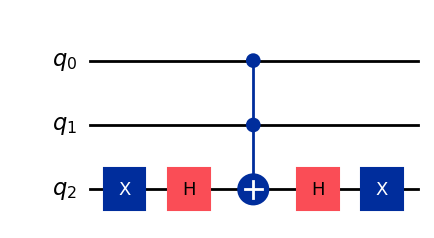


Diffusion Circuit:


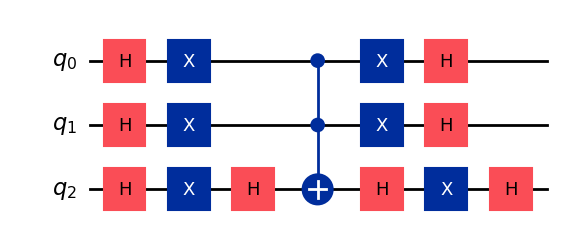

In [133]:
n=3

circOracle = createUf(SameTargetFunction(PHASE_TARGET), n)
print("\nOracle Circuit:")
display(circOracle.draw(output='mpl'))

circDiffusion = createGroverDiffusion(n)
print("\nDiffusion Circuit:")
display(circDiffusion.draw(output='mpl'))

### Testing Grover's

In [134]:
def groverAlgorithm(f, n, iterations=None):
    qc = QuantumCircuit(n, n)

    qc.h(range(n))

    if iterations is None:
        iterations = int(np.floor(np.pi/4 * np.sqrt(2**n)))

    for _ in range(iterations):
        qc.compose(createUf(f, n), inplace=True)
        qc.compose(createGroverDiffusion(n), inplace=True)

    qc.measure(range(n), range(n))

    return qc

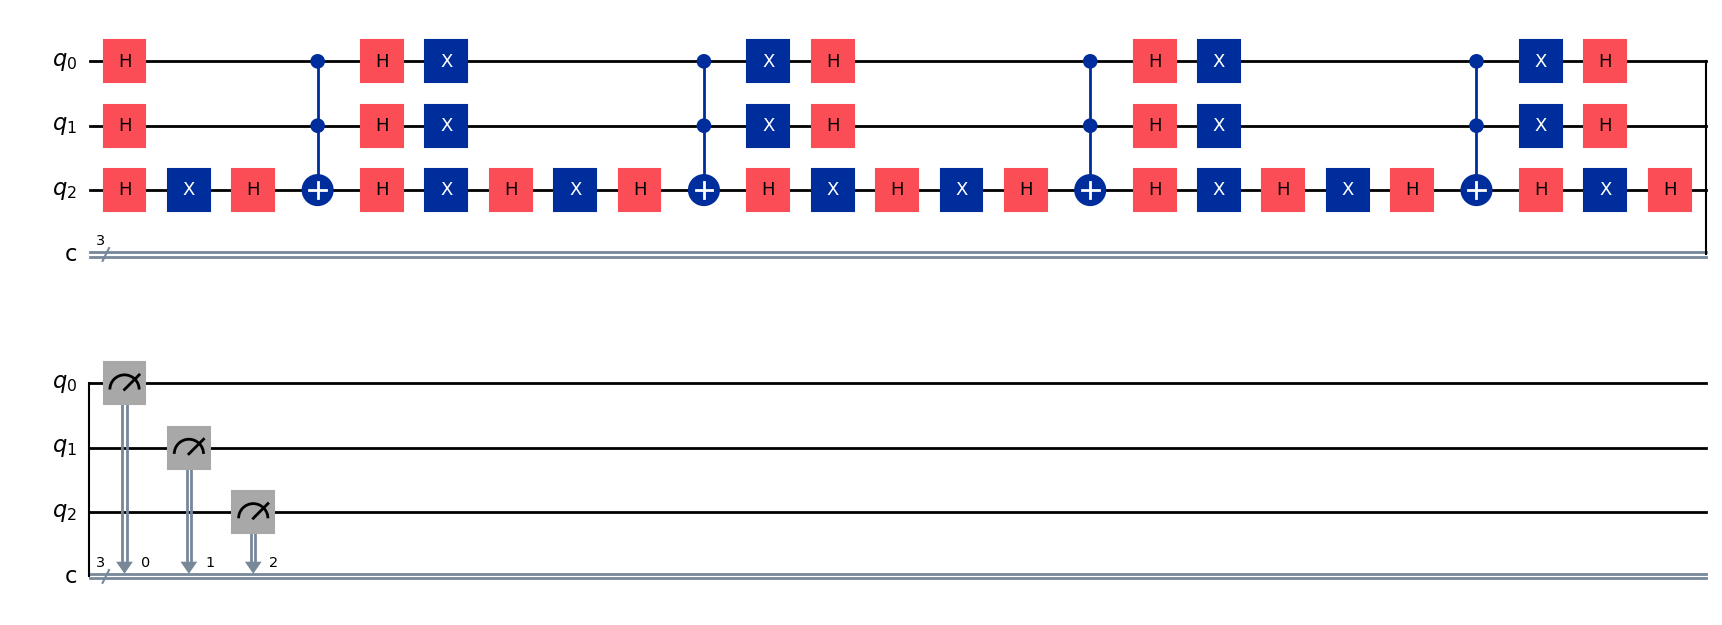

In [135]:
circGrover = groverAlgorithm(SameTargetFunction(PHASE_TARGET), len(PHASE_TARGET))
circGrover.draw(output='mpl')

Number of iterations (optimal): 2
Measurement results:
{'011': 959, '111': 13, '101': 12, '010': 9, '001': 5, '100': 8, '110': 11, '000': 7}


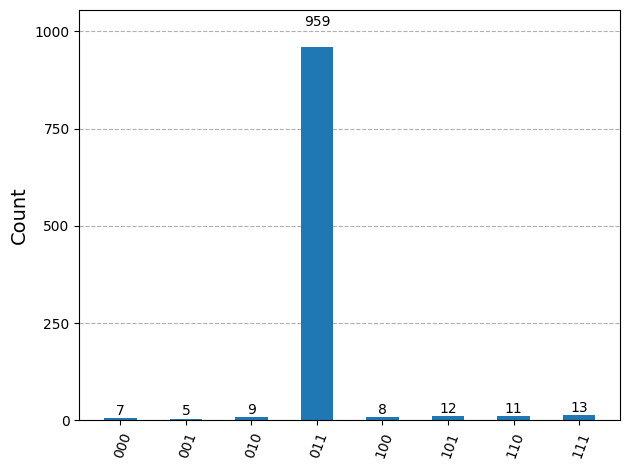

In [136]:
N = len(PHASE_TARGET)
f = SameTargetFunction(PHASE_TARGET)
print(f"Number of iterations (optimal): {int(np.floor(np.pi/4 * np.sqrt(2**n)))}")

circGrover = groverAlgorithm(f, N)

result = BACKEND.run(circGrover, shots=SHOTS).result()
counts = result.get_counts()

print("Measurement results:")
print(counts)

plot_histogram(counts)


Number of iterations (more than optimal): 4
Measurement results:
{'110': 161, '100': 144, '010': 155, '000': 127, '111': 137, '101': 162, '001': 129, '011': 9}


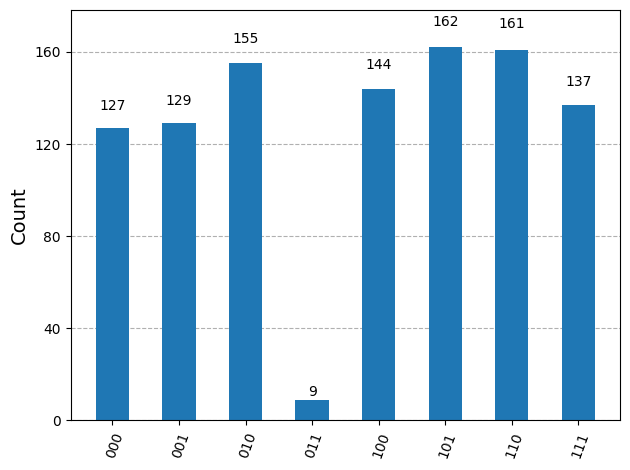

In [137]:
N = len(PHASE_TARGET)
f = SameTargetFunction(PHASE_TARGET)
iterationsMore = int(np.floor(np.pi/2 * np.sqrt(2**n)))
print(f"Number of iterations (more than optimal): {iterationsMore}")

circGrover = groverAlgorithm(f, N, iterations=iterationsMore)

result = BACKEND.run(circGrover, shots=SHOTS).result()
counts = result.get_counts()

print("Measurement results:")
print(counts)

plot_histogram(counts)

Number of iterations (less than optimal): 1
Measurement results:
{'011': 786, '010': 36, '001': 30, '111': 35, '100': 33, '101': 40, '000': 34, '110': 30}


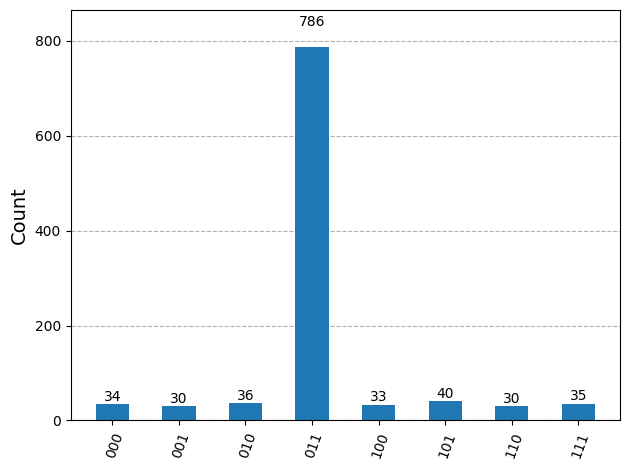

In [138]:
N = len(PHASE_TARGET)
f = SameTargetFunction(PHASE_TARGET)
iterationsLess = max(1, int(np.floor(np.pi/8 * np.sqrt(2**N))))
print(f"Number of iterations (less than optimal): {iterationsLess}")

circGrover = groverAlgorithm(f, N, iterations=iterationsLess)

result = BACKEND.run(circGrover, shots=SHOTS).result()
counts = result.get_counts()

print("Measurement results:")
print(counts)

plot_histogram(counts)